<a href="https://colab.research.google.com/github/KathituCodes/-Titanic-Survival-Prediction-Decision-Trees-and-Random-Forests/blob/main/Titanic_Survival_Prediction_Decision_Trees_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚢 Titanic Survival Prediction: Decision Trees and Random Forests

This notebook walks through a complete machine learning pipeline using the Titanic dataset.

We'll cover:
- Loading and cleaning the data
- Understanding Gini impurity
- Building Decision Tree and Random Forest models
- Using cross-validation for evaluation
- Comparing model performances

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Cleaned Titanic data.xlsx - Sheet1.csv')

# Show the first few rows
df.head()

,PassengerId,Passenger class,Title,Other names,Surname,Gender,Age,Family size,Ticket,Fare,Cabin,Embarked,Survival
0,1,3rd class,Mr,Owen Harris,Braund,male,22.0,2,A/5 21171,7.2500,NaN,Southampton,Died
1,2,1st class,Mrs,John Bradley (Florence Briggs Thayer),Cumings,female,38.0,2,PC 17599,71.2833,C85,Cherbourg,Survived
2,3,3rd class,Miss,Laina,Heikkinen,female,26.0,1,STON/O2. 3101282,7.9250,NaN,Southampton,Survived
3,4,1st class,Mrs,Jacques Heath (Lily May Peel),Futrelle,female,35.0,2,113803,53.1000,C123,Southampton,Survived
4,5,3rd class,Mr,William Henry,Allen,male,35.0,1,373450,8.0500,NaN,Southampton,Died


- Load the Titanic dataset from CSV.
- Display the first few rows to get a feel for the data.

In [ ]:
df.describe()

,PassengerId,Age,Family size,Fare
count,891.000000,714.000000,891.000000,891.000000
mean,446.000000,29.699118,1.904602,32.204208
std,257.353842,14.526497,1.613459,49.693429
min,1.000000,0.420000,1.000000,0.000000
25%,223.500000,20.125000,1.000000,7.910400
50%,446.000000,28.000000,1.000000,14.454200
75%,668.500000,38.000000,2.000000,31.000000
max,891.000000,80.000000,11.000000,512.329200


In [ ]:
# Summary of the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Passenger class  891 non-null    object 
 2   Title            891 non-null    object 
 3   Other names      891 non-null    object 
 4   Surname          891 non-null    object 
 5   Gender           891 non-null    object 
 6   Age              714 non-null    float64
 7   Family size      891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
 12  Survival         891 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 90.6+ KB


In [ ]:
# check for the highest family size
df['Family size'].max()

11

In [ ]:
# Check for missing values
df.isnull().sum()

,0
PassengerId,0
Passenger class,0
Title,0
Other names,0
Surname,0
Gender,0
Age,177
Family size,0
Ticket,0
Fare,0


- Show column data types and missing values.

In [ ]:
# Drop irrelevant columns and the 'Cabin' column
df.drop(['PassengerId', 'Other names', 'Title', 'Surname', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

- These columns don't help in predicting survival and can be removed.

In [ ]:
# Fill missing 'Age' with median

df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-66-3991eebeefcb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-66-3991eebeefcb>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

- Replace missing values in 'Age' with the median.
- Replace missing 'Embarked' values with the most common one.

In [ ]:
# Convert 'Sex' to numerical
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})

# Convert Passenger class to numerical
df['Passenger class'] = df['Passenger class'].map({'1st class': 1, '2nd class': 2, '3rd class': 3})

#
# Convert 'Survial' and 'Died' to numerical
df['Survival'] = df['Survival'].map({'Survived': 1, 'Died': 0})



- Convert 'Sex' into 0 and 1 for male and female.
- Convert 'Survival" into 1 for survived and 0 for died

In [ ]:
# Check current columns
print(df.columns)

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

Index(['Passenger class', 'Gender', 'Age', 'Family size', 'Embarked',
       'Survival'],
      dtype='object')


- Turn 'Embarked' into multiple binary columns using one-hot encoding.

In [ ]:
# Check the new updated dataframe with just the columns we need to build our model
df.head()

,Passenger class,Gender,Age,Family size,Survival,Embarked_Queenstown,Embarked_Southampton
0,3,0,22.0,2,0,False,True
1,1,1,38.0,2,1,False,False
2,3,1,26.0,1,1,False,True
3,1,1,35.0,2,1,False,True
4,3,0,35.0,1,0,False,True


# Build a Decision Tree Model

# Calculate the Gini Impurity

In [ ]:
# Separate features (X) and target (y)
# Ensure that 'Survival' is dropped from the features
X = df.drop('Survival', axis=1)
y = df['Survival']

# It appears the original 'Embarked' column might still be in X.
# We need to explicitly drop it if it exists, as get_dummies created new columns.
# This is a safeguard in case the drop_first=True didn't remove the original.
if 'Embarked' in X.columns:
    X = X.drop('Embarked', axis=1)

# Train a Decision Tree
# IMPORTANT: Do not reassign the DataFrame variable 'df' to the classifier.
# Use a new variable name for the classifier, e.g., 'tree_classifier' or 'dt'.
tree_classifier = DecisionTreeClassifier(criterion='gini')
tree_classifier.fit(X, y)

# Show feature importances
feature_importance = pd.Series(tree_classifier.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False)

,0
Gender,0.366524
Age,0.315753
Family size,0.155031
Passenger class,0.137668
Embarked_Southampton,0.020869
Embarked_Queenstown,0.004155


Text(0, 0.5, 'Features')

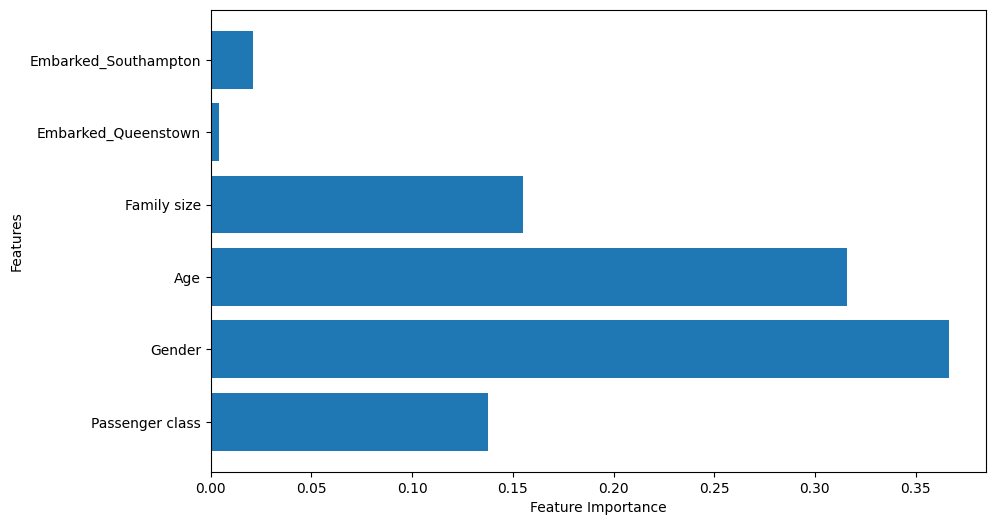

In [ ]:
# Plot a hirizontal bar plot showing a visual representation of your feature importances

plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance.values)
plt.xlabel('Feature Importance')
plt.ylabel('Features')

 Interpretation of the Bar Chart:

- Gender stands out as the most influential factor in predicting survival, with the highest importance score (~0.39).

- Age also plays a major role (~0.31), likely because younger passengers were more likely to survive.

- Family size and Passenger class contributed less, but still offered helpful signals.

💡 This chart helps you quickly see which features your Decision Tree model relied on the most. You can use this to:

- Prioritize which features to keep or engineer further.

### 🧠 Interpreting the Values:

| Feature             | Importance | Interpretation                                                                                                                            |
| ------------------- | ---------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| **Gender**          | 0.3937     |  Most important: Gender helped the model the most in deciding who survived. This matches what we know—women had a higher survival rate. |
| **Age**             | 0.3129     |  Important: Age helped the tree distinguish survival chances (e.g., children may have had priority).                                    |
| **Family size**     | 0.1538     |  Somewhat useful: Possibly influenced survival—people with family might behave differently or get help.                           |
| **Passenger class** | 0.1397     | Least useful here: Although often important (e.g., 1st class had higher survival), in your model it was less helpful than the others.  |






# Train a Decision Tree Model

In [ ]:


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree
dt = DecisionTreeClassifier(max_depth=4, criterion='gini', min_samples_split=10, random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8100558659217877

In [ ]:
# Print the classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.66      0.74        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179





## Overview of the Table

| Term          | What It Means                                                                             |
| ------------- | ----------------------------------------------------------------------------------------- |
| **Precision** | Out of all the passengers the model *guessed* survived (or died), how many were correct?  |
| **Recall**    | Out of all the passengers who *actually* survived (or died), how many did the model find? |
| **F1-score**  | A balance between precision and recall. It’s a combined score.                            |
| **Support**   | How many real people were in each group (0 = died, 1 = survived)?                         |



#### Class `0` (People who **did not survive**):

* **Precision = 0.79**
  → Out of all the people the model guessed as “died,” **79% were correct**.
* **Recall = 0.91**
  → Out of all the people who actually died, the model found **91% of them**.
* **F1-score = 0.85**
  → A strong score that means it's doing a pretty good job predicting who didn’t survive.
* **Support = 105**
  → There were 105 people in the test set who did not survive.



#### Class `1` (People who **survived**):

* **Precision = 0.84**
  → Of those predicted to survive, **84% actually did**.
* **Recall = 0.66**
  → Out of all the people who really survived, the model only caught **66%**.
* **F1-score = 0.74**
  → Not as strong as class 0. It means the model misses some actual survivors.
* **Support = 74**
  → There were 74 survivors in the test data.



### Overall Accuracy

* **Accuracy = 0.81**
  → The model got the right answer for **81% of all passengers**.



### Macro and Weighted Averages

* **Macro avg = 0.82 / 0.79 / 0.80**
  → This treats each class (survived/died) **equally**, even if one is bigger.
* **Weighted avg = 0.81 / 0.81 / 0.81**
  → This takes **how many** are in each group into account. More realistic.



### Simple Summary:

> 🔍 "The model does a great job spotting people who **did not survive** (91% recall), but it's **less accurate** when guessing who **did survive** (only 66% recall).
> Overall, it gets about **8 out of 10 passengers correct**."




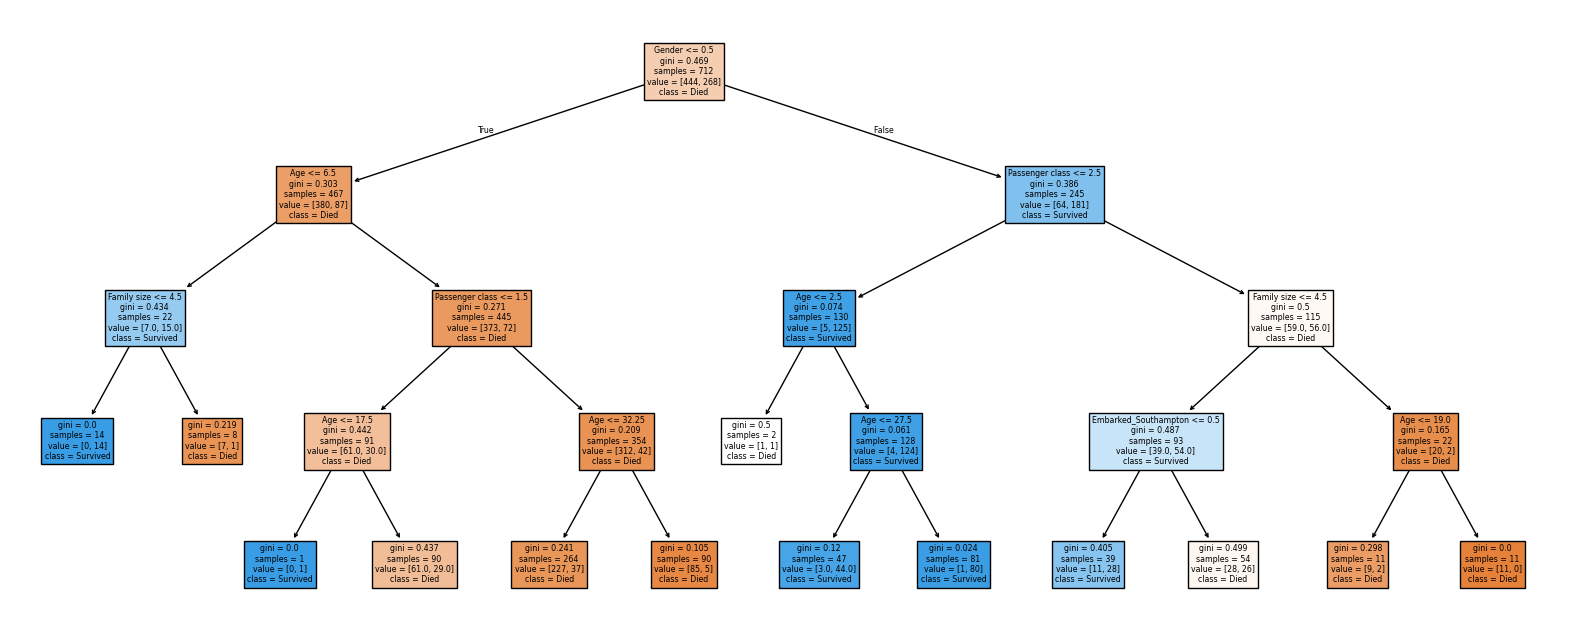

In [ ]:
# Plot a decsision tree and give a large figure size

plt.figure(figsize=(20, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Died', 'Survived'])
plt.show()

Each **box** (node) in the tree:

* Asks a **question** about a passenger’s feature (like age or gender).
* Splits the data based on **yes (True)** or **no (False)**.
* Shows how many people **survived or didn’t survive** at that step.
* Uses **color** to show the final guess:

  * 🔵 Blue = likely survived
  * 🟠 Orange = likely did not survive
  * The **darker** the color, the more confident the prediction.

---

### How the Tree Works:

Let’s walk down the **left side of the tree**:

1. **First Question (Top of Tree):**
   ➤ *“Was the passenger female?”* (Gender ≤ 0.5)

   * ✅ If yes (likely male), go left
   * ❌ If no (likely female), go right

---

#### Left Side (likely Male):

2. **Next Question:**
   ➤ *“Was the passenger age 6.5 years or younger?”*

   * Younger kids go left — many survived
   * Older go right — fewer survived

3. **Then it asks about Family size and Passenger class.**

   * Kids with smaller families mostly survived
   * Older males in low passenger class mostly didn't

---

#### Right Side (likely Female):

2. **Next Question:**
   ➤ *“Was the passenger in 3rd class?”* (Passenger class ≤ 2.5)

   * If yes, go left
   * If not (1st or 2nd class), go right

3. **Next Questions:**

   * **Age:** Younger women survived more
   * **Embarked (boarding port):** This affects the pattern, but less strongly
   * **Family size:** Having family sometimes made survival more likely

---

### 🔍 What the Tree Is Learning:

* **Females had a higher survival rate**—the tree splits by gender first.
* **Very young children** also had a higher chance of surviving.
* **Passenger class** affects survival—1st and 2nd class passengers fared better.
* **Family size** matters too—people with small families had a better chance.

---

### ✅ Final Prediction:

At the **bottom of each branch**, the tree makes a guess:

* Based on all the answers above, do people like this usually **survive** or **not**?
* That’s the **class = Survived** or **class = Died** label in the boxes.

---



In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation with 5 folds
cv_scores = cross_val_score(dt, X, y, cv=5)
cv_scores.mean()

np.float64(0.8148389931579938)

- Cross-validation tests the model on different parts of the data.
- Gives a more reliable accuracy score.

In [ ]:
# Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_rf_pred = rf.predict(X_test)
accuracy_score(y_test, y_rf_pred)

0.8156424581005587

- Random Forest uses many decision trees for better accuracy.
- More stable and less likely to overfit.

In [ ]:
# Print the classifcation report
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
# Compare accuracies
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))

Decision Tree Accuracy: 0.8100558659217877
Random Forest Accuracy: 0.8156424581005587


- Compare both models to see which one performs better.

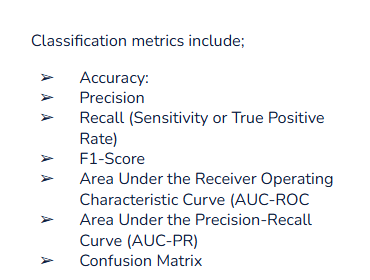